# Kai ming initialization

When matrices or normally distributed values are multiplied with each other the standard deviation expands. Which is a problem for activation functions and their gradients.


We will therefor demonstrate the initialization technique proposed [here](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.kaiming_normal_).

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

### Normal initialization

In [2]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200)

y = x @ w

tensor(-0.0043) tensor(0.9947)


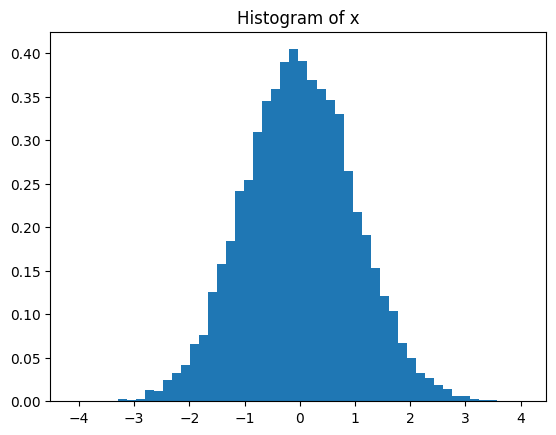

In [3]:
print(x.mean(), x.std())
plt.hist(x.view(-1), 50, density=True)
plt.title("Histogram of x");

tensor(0.0245) tensor(1.0227)


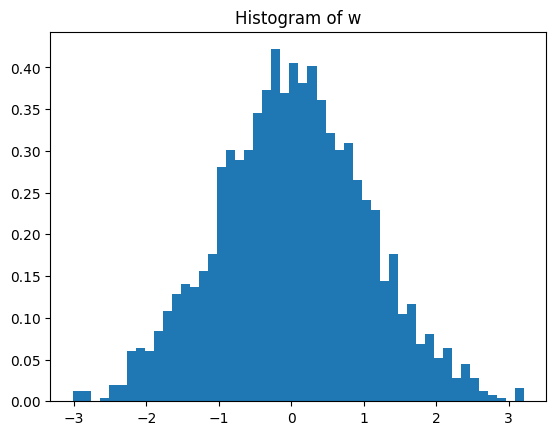

In [4]:
print(w.mean(), w.std())
plt.hist(w.view(-1), 50, density=True)
plt.title("Histogram of w");

tensor(-9.0485e-05) tensor(3.2091)


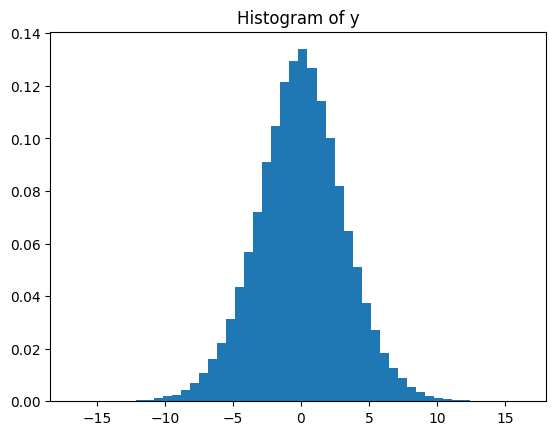

In [5]:
print(y.mean(), y.std())
plt.hist(y.view(-1), 50, density=True)
plt.title("Histogram of y");

### Kai ming initialization

Properties of normally distributed matrices

As illustrated below, multiplying a normally distributed matrix with unit standard deviation with some number, e.g. 0.1 will actually set the standard deviation to this number.

In [13]:
x = torch.randn(1000, 10)
print(x.mean(), x.std())
x = x * 0.1
print(x.mean(), x.std())
x = x * 100
print(x.mean(), x.std())

tensor(-0.0048) tensor(0.9956)
tensor(-0.0005) tensor(0.0996)
tensor(-0.0483) tensor(9.9564)


Using the Kai Ming method we will now initialize the weight matrix by multiplying it with the gain over the square root of the number of input columns. Gain here will be 1.

$$
\text{std} = \frac{gain}{\sqrt{fan\_mode}}
$$

And using this method we can see that the output matrix y has a std of 1, which is the desired result. 

In [6]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200) * 1/10**0.5

y = x @ w

tensor(0.0088) tensor(0.9940)


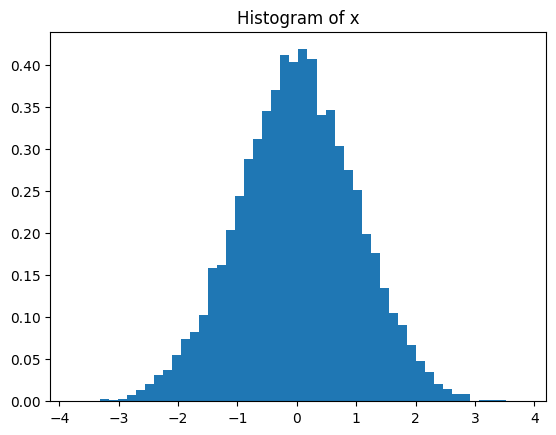

In [7]:
print(x.mean(), x.std())
plt.hist(x.view(-1), 50, density=True)
plt.title("Histogram of x");

tensor(0.0173) tensor(0.3120)


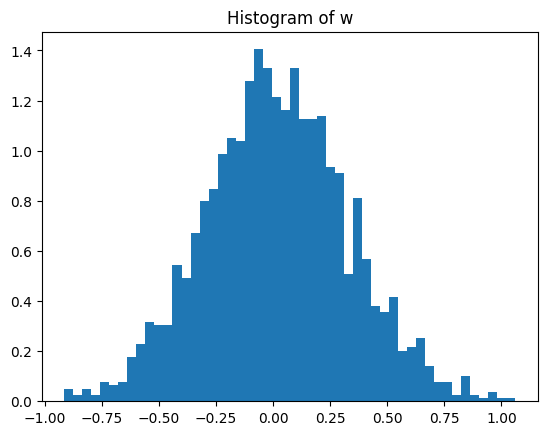

In [8]:
print(w.mean(), w.std())
plt.hist(w.view(-1), 50, density=True)
plt.title("Histogram of w");

tensor(0.0014) tensor(0.9814)


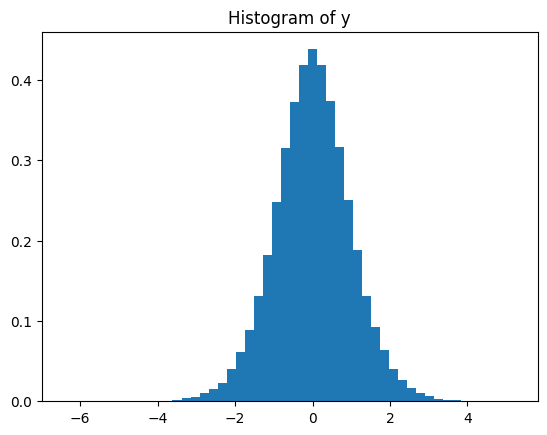

In [9]:
print(y.mean(), y.std())
plt.hist(y.view(-1), 50, density=True)
plt.title("Histogram of y");